# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `dataproject.py` file includes a function which will be used multiple times in this notebook.

Imports and set magics:

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2 # install with pip install matplotlib-venn
plt.style.use('seaborn-whitegrid')

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

## Wage

**Read the Lonniveau data** in ``LIGELB1.xlsx`` and **clean it** removing and renaming columns:

In [44]:
# a. load
wage = pd.read_excel('LIGELB1.xlsx', skiprows=2)

# b. drop columns
drop_these = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']
wage.drop(drop_these, axis=1, inplace=True)

# c. rename columns
wage.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True)

# d. Display
wage.head()

# e. Remove ChristiansØ
wage_A = dataproject.only_keep_municipalities(wage)
wage_A.head()

,municipality,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hele landet,35734,36941,37527,38290,38708,39111,39763,40291,41144,41931
1,København,36607,37836,38595,39302,39863,40339,41190,41740,42894,43953
2,Frederiksberg,41119,42816,43450,44220,44873,45424,46297,47182,48321,49563
3,Dragør,43215,44832,46357,47181,47302,47961,49333,50410,51451,52807
4,Tårnby,36147,36811,38133,38332,38815,39284,39946,40575,41559,42664


**Convert the dataset to long format**:

In [45]:
# a. rename year columns
mydict = {str(i):f'wage{i}' for i in range(2009,2019)}
wage_A.rename(columns = mydict, inplace=True)

# b. convert to long
wage_long = pd.wide_to_long(wage_A, stubnames='wage', i='municipality', j='year').reset_index()

# c. show
wage_long.head(5)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,municipality,year,wage
0,Hele landet,2009,35734
1,København,2009,36607
2,Frederiksberg,2009,41119
3,Dragør,2009,43215
4,Tårnby,2009,36147


In [46]:
wage_long = wage_long.sort_values(['municipality','year']) # sort by first municipality then year
wage_long.head(5)

,municipality,year,wage
68,Aabenraa,2009,33192
167,Aabenraa,2010,34119
266,Aabenraa,2011,34825
365,Aabenraa,2012,35338
464,Aabenraa,2013,35615


In [47]:
wage_long.groupby('municipality')['wage'].mean().head(5)

DataError: No numeric types to aggregate

In [48]:
wage_long.groupby('municipality')['wage'].apply(lambda x: x.diff(1).mean()).head(40)

municipality
Aabenraa            512.666667
Aalborg             668.333333
Aarhus              744.666667
Albertslund         554.111111
Allerød             827.444444
Assens              593.555556
Ballerup            716.444444
Billund             697.666667
Bornholm            473.888889
Brøndby             501.000000
Brønderslev         575.555556
Dragør             1065.777778
Egedal              775.777778
Esbjerg             597.888889
Faaborg-Midtfyn     534.444444
Fanø                688.333333
Favrskov            716.000000
Faxe                561.222222
Fredensborg         708.666667
Fredericia          633.333333
Frederiksberg       938.222222
Frederikshavn       499.777778
Frederikssund       650.333333
Furesø              884.888889
Gentofte           1170.444444
Gladsaxe            766.888889
Glostrup            698.444444
Greve               750.444444
Gribskov            655.555556
Guldborgsund        548.000000
Haderslev           577.000000
Halsnæs             588.11

In [49]:
wage_long.groupby('municipality')['wage'].apply(lambda x: x.mean()).head(5)

municipality
Aabenraa       35671.2
Aalborg        37396.4
Aarhus         39497.7
Albertslund    37644.1
Allerød        49270.7
Name: wage, dtype: float64

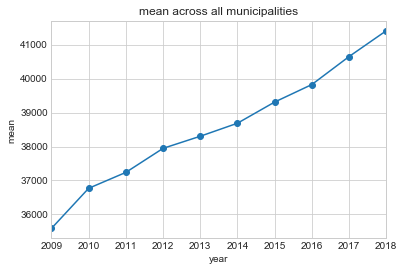

In [50]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

wage_long.groupby('year')['wage'].apply(lambda x: x.mean()).plot(ax=ax,style='-o')

ax.set_ylabel('mean')
ax.set_title('mean across all municipalities');

In [51]:
print(wage_long.head())
wage_grouped = wage.groupby('municipality')['wage']

municipality  year   wage
68      Aabenraa  2009  33192
167     Aabenraa  2010  34119
266     Aabenraa  2011  34825
365     Aabenraa  2012  35338
464     Aabenraa  2013  35615


KeyError: 'Column not found: wage'

In [52]:
w_mean = wage_grouped.mean() # mean employment rate
w_mean.head(10)

NameError: name 'wage_grouped' is not defined

## Gini

In [53]:
# a. load
gini = pd.read_excel('IFOR41.xlsx', skiprows=2)

# b. drop columns
drop_these = ['Unnamed: 0']
gini.drop(drop_these, axis=1, inplace=True)

# c. rename columns
gini.rename(columns = {'Unnamed: 1':'municipality'}, inplace=True)

# d. Display
gini.head(5)

# e. Remove ChristiansØ
gini = dataproject.only_keep_municipalities(gini)
gini.head(5)


,municipality,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hele landet,26.74,27.47,27.68,27.37,27.88,28.33,28.77,28.97,29.32,29.10
1,København,29.38,31.44,31.38,31.25,31.86,32.13,32.70,33.24,33.65,33.71
2,Frederiksberg,30.33,32.93,33.22,33.53,33.92,34.98,34.37,34.85,35.71,35.42
3,Dragør,26.25,26.93,28.86,25.95,26.75,27.03,27.40,28.08,27.88,27.55
4,Tårnby,21.40,22.80,23.42,22.77,22.86,22.89,23.32,23.66,23.95,23.95


In [54]:
diff_m = [m for m in wage.municipality.unique() if m not in gini.municipality.unique()] 
print(f'municipalities in wage data, but not in gini data: {diff_m}')
#We Therefore remove 'Christiansø' from our wage dataset using the 'function'

municipalities in wage data, but not in gini data: ['Christiansø', nan]


**Convert the dataset to long format**:

In [55]:
# a. rename year columns
mydict1 = {str(i):f'gini{i}' for i in range(2009,2019)}
gini.rename(columns = mydict1, inplace=True)

# b. convert to long
gini_long = pd.wide_to_long(gini, stubnames='gini', i='municipality', j='year').reset_index()

# c. show
gini_long.head()

,municipality,year,gini
0,Hele landet,2009,26.74
1,København,2009,29.38
2,Frederiksberg,2009,30.33
3,Dragør,2009,26.25
4,Tårnby,2009,21.40


In [56]:
#gini_use.groupby('municipality')['gini'].mean().head(8)

Text(0.5,1,'std. dev. across municipalities in the employment rate')

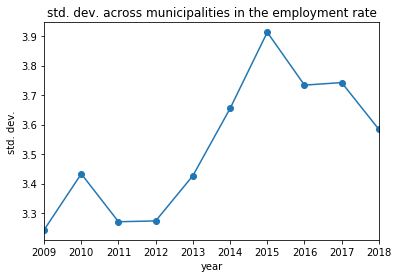

## Explore data set

In order to be able to **explore the raw data**, we here provide an **interactive plot** to show, respectively, the employment and income level in each municipality

The **static plot** is:

In [57]:
def plot_wage_gini(wage,gini,dataset,municipality): 
    
    if dataset == 'wage':
        df = wage
        y = 'wage'
    else:
        df = gini
        y = 'gini'
    
    I = df['municipality'] == municipality
    ax = df.loc[I,:].plot(x='year', y=y, style='-o')

The **interactive plot** is:

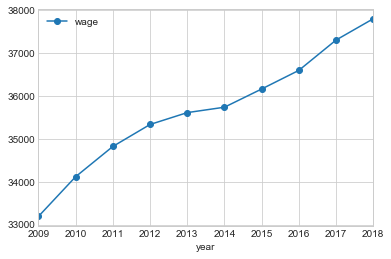

In [58]:
widgets.interact(plot_wage_gini, 
    
    wage = widgets.fixed(wage_long),
    gini = widgets.fixed(gini_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['wage','gini']),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=wage_long.municipality.unique())
               
); 
widgets.interact(plot_wage_gini, 
    
    wage = widgets.fixed(wage_long),
    gini = widgets.fixed(gini_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['wage','gini']),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=wage_long.municipality.unique())
                 
); 

# NEW GRAPH

In [59]:
#We select the municipalities we wish to illustrate

In [72]:
wage_hele_landet = wage_long.loc[wage_long['municipality'] == 'Hele landet', :]
wage_Ishøj = wage_long.loc[wage_long['municipality'] == 'Ishøj', :]
wage_Gentofte = wage_long.loc[wage_long['municipality'] == 'Gentofte', :]
wage_hele_landet.head(10)

,municipality,year,wage
0,Hele landet,2009,35734
99,Hele landet,2010,36941
198,Hele landet,2011,37527
297,Hele landet,2012,38290
396,Hele landet,2013,38708
495,Hele landet,2014,39111
594,Hele landet,2015,39763
693,Hele landet,2016,40291
792,Hele landet,2017,41144
891,Hele landet,2018,41931


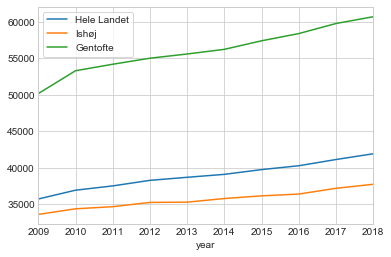

In [73]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
wage_hele_landet.plot(x='year',y='wage',ax=ax,label='Hele Landet')
wage_Ishøj.plot(x='year',y='wage',ax=ax,label='Ishøj')
wage_Gentofte.plot(x='year',y='wage',ax=ax,label='Gentofte')

ax.grid(True)
ax.legend(frameon=True)

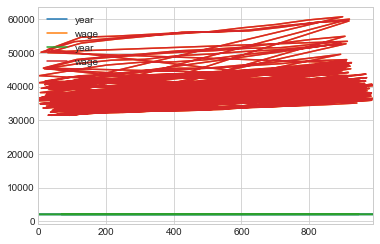

In [62]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

wage_long.plot(ax=ax)
wage_long.plot(ax=ax)

ADD SOMETHING HERE IF THE READER SHOULD KNOW THAT E.G. SOME MUNICIPALITY IS SPECIAL.

# Merge data sets

We now create a data set with **municpalities which are in both of our data sets**. This means removing Christiansø from our datasets, so they represent the same municpalities and all of Denmark.

In [63]:
print(len(gini_long.year.unique()))
print(len(wage_long.year.unique()))
print(len(gini_long.municipality.unique()))
print(len(wage_long.municipality.unique()))

#We merge the two datasets:
merged = pd.merge(gini_long, wage_long ,how='inner',on=['municipality','year'])

print(f'Number of municipalities = {len(merged.municipality.unique())}')
print(f'Number of years          = {len(merged.year.unique())}')

10
10
99
99
Number of municipalities = 99
Number of years          = 10


In [64]:
merged.head(5)

,municipality,year,gini,wage
0,Hele landet,2009,26.74,35734
1,København,2009,29.38,36607
2,Frederiksberg,2009,30.33,41119
3,Dragør,2009,26.25,43215
4,Tårnby,2009,21.40,36147


# Merge forsøg

# Analysis

To get a quick overview of the data, we show some **summary statistics by year**:

In [65]:
print(merged.groupby('year').agg(['mean','std','max','min']).round(2))
print(gini_long.groupby('year').agg(['mean','std','max','min']).round(2))
print(gini_long)
print(wage_long)
print(merged.groupby('year').agg(['mean']))

gini                    
       mean   std    max    min
year                           
2009  25.28  3.24  42.42  20.40
2010  25.50  3.43  43.42  21.65
2011  25.48  3.27  42.83  20.94
2012  25.11  3.27  42.13  20.71
2013  25.50  3.43  43.39  21.51
2014  25.73  3.65  43.98  21.44
2015  26.04  3.91  47.77  22.03
2016  26.38  3.73  45.02  22.50
2017  26.58  3.74  45.44  21.63
2018  26.40  3.58  44.50  22.88
       gini                    
       mean   std    max    min
year                           
2009  25.28  3.24  42.42  20.40
2010  25.50  3.43  43.42  21.65
2011  25.48  3.27  42.83  20.94
2012  25.11  3.27  42.13  20.71
2013  25.50  3.43  43.39  21.51
2014  25.73  3.65  43.98  21.44
2015  26.04  3.91  47.77  22.03
2016  26.38  3.73  45.02  22.50
2017  26.58  3.74  45.44  21.63
2018  26.40  3.58  44.50  22.88
        municipality  year   gini
0        Hele landet  2009  26.74
1          København  2009  29.38
2      Frederiksberg  2009  30.33
3             Dragør  2009  26.25
4    

ADD FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.